##imports

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors

##getting the data from Kaggle
steps:
1. Download kaggle.json from kaggle and upload it
2. Install kaggle
3. Create directory named kaggle and copy the json file inside this folder
4. Download both datasets and unzip the folder

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andrewhanynady","key":"354290fb45dbe6eaabafc0f0910ec6e3"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

  0% 0.00/175k [00:00<?, ?B/s]
100% 175k/175k [00:00<00:00, 80.8MB/s]


In [ ]:
!unzip imdb-dataset-of-top-1000-movies-and-tv-shows.zip

Archive:  imdb-dataset-of-top-1000-movies-and-tv-shows.zip
  inflating: imdb_top_1000.csv       


In [ ]:
!kaggle datasets download -d narayan63/netflix-popular-movies-dataset

  0% 0.00/1.17M [00:00<?, ?B/s]
100% 1.17M/1.17M [00:00<00:00, 131MB/s]


In [ ]:
!unzip netflix-popular-movies-dataset.zip

Archive:  netflix-popular-movies-dataset.zip
  inflating: n_movies.csv            


##Read Data

In [ ]:
Netflix_df=pd.read_csv("n_movies.csv")
Imdb_df=pd.read_csv("imdb_top_1000.csv")

In [ ]:
Netflix_df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [ ]:
Imdb_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


##EDA for Netflix data

In [ ]:
Netflix_df.shape

(9957, 9)

In [ ]:
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


In [ ]:
Netflix_df.isnull().sum()

title             0
year            527
certificate    3453
duration       2036
genre            73
rating         1173
description       0
stars             0
votes          1173
dtype: int64

In [ ]:
numsCol=Netflix_df.select_dtypes("number").columns
numsCol

Index(['rating'], dtype='object')

In [ ]:
catCols=Netflix_df.select_dtypes("object").columns
catCols

Index(['title', 'year', 'certificate', 'duration', 'genre', 'description',
       'stars', 'votes'],
      dtype='object')

In [ ]:
Netflix_df.describe()

,rating
count,8784.000000
mean,6.764515
std,1.214840
min,1.700000
25%,6.100000
50%,6.900000
75%,7.600000
max,9.900000


###Check the Top 10 rated movies

In [ ]:
Top10Movies=Netflix_df.sort_values("rating",ascending=False).head(20)

In [ ]:
Top10Movies["title"].value_counts()

Avatar: The Last Airbender    4
JoJo's Bizarre Adventure      3
Dark                          3
BoJack Horseman               2
Stranger Things               2
Breaking Bad                  2
1899                          1
Dexter                        1
Anne with an E                1
Cobra Kai                     1
Name: title, dtype: int64

In [ ]:
# Top10Movies["genre"].apply(lambda x:x.split(",")).value_counts()
Top10Movies["genre"].value_counts()

Animation, Action, Adventure    7
Crime, Drama, Mystery           4
Animation, Comedy, Drama        2
Drama, Fantasy, Horror          2
Crime, Drama, Thriller          2
Drama, History, Horror          1
Drama, Family                   1
Action, Comedy, Drama           1
Name: genre, dtype: int64

In [ ]:
from collections import Counter
array=Top10Movies["genre"].apply(lambda x:x.split(", ")).iloc[0]
for i in range(1,Top10Movies.shape[0]):
  array+=Top10Movies["genre"].apply(lambda x:x.split(", ")).iloc[i]


genres = dict(Counter(array))
print(genres)

{'Animation': 9, 'Comedy': 3, 'Drama': 13, 'Fantasy': 2, 'Horror': 3, 'Action': 8, 'Adventure': 7, 'History': 1, 'Crime': 6, 'Mystery': 4, 'Family': 1, 'Thriller': 2}


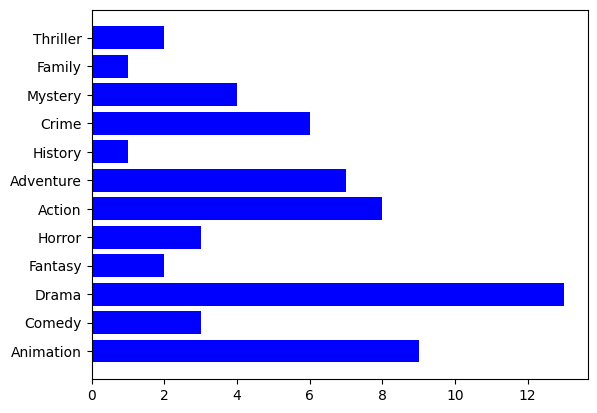

In [ ]:

plt.barh(list(genres.keys()), list(genres.values()), color='b')
plt.show()

###As we can see there are many dublicate movies in the datasets

In [ ]:
Netflix_df.drop_duplicates(subset=["title"]).shape

(7912, 9)

###check every column
we already
1. checked the top 10 movies
2. knew that many movies are dublicates
3. also the genre column

some movies or series have more than one season (not sure if that will be benefial in the model or not)

In [ ]:
Netflix_df.loc[0:10,['year','title']]

,year,title
0,(2018– ),Cobra Kai
1,(2016– ),The Crown
2,(2015–2022),Better Call Saul
3,(2022),Devil in Ohio
4,(2022– ),Cyberpunk: Edgerunners
5,(2022– ),The Sandman
6,(2013– ),Rick and Morty
7,(2008–2013),Breaking Bad
8,(2022– ),The Imperfects
9,(2022),Blonde


we need to convert duration column to numeric (easy feature engineering)

In [ ]:
Netflix_df.loc[0:10,['duration','title']]

,duration,title
0,30 min,Cobra Kai
1,58 min,The Crown
2,46 min,Better Call Saul
3,356 min,Devil in Ohio
4,24 min,Cyberpunk: Edgerunners
5,45 min,The Sandman
6,23 min,Rick and Morty
7,49 min,Breaking Bad
8,45 min,The Imperfects
9,166 min,Blonde


**Certificates** can be very benefial to understand the user more.

For example MA: means MA - 15+ Restricted (Under 15 only with an adult)
Link:[Certificates meanings](https://help.imdb.com/article/contribution/titles/certificates/GU757M8ZJ9ZPXB39?ref_=helpart_nav_27#)

In [ ]:
Netflix_df.loc[0:10,['certificate','title']]

,certificate,title
0,TV-14,Cobra Kai
1,TV-MA,The Crown
2,TV-MA,Better Call Saul
3,TV-MA,Devil in Ohio
4,TV-MA,Cyberpunk: Edgerunners
5,TV-MA,The Sandman
6,TV-MA,Rick and Morty
7,TV-MA,Breaking Bad
8,TV-MA,The Imperfects
9,NC-17,Blonde


We can use the description column to get keywords for search engine (not sure how this can be benefial in the model)

In [ ]:
Netflix_df.loc[0:10,['description','title']]

,description,title
0,Decades after their 1984 All Valley Karate Tou...,Cobra Kai
1,Follows the political rivalries and romance of...,The Crown
2,The trials and tribulations of criminal lawyer...,Better Call Saul
3,When a psychiatrist shelters a mysterious cult...,Devil in Ohio
4,A Street Kid trying to survive in a technology...,Cyberpunk: Edgerunners
5,Upon escaping after decades of imprisonment by...,The Sandman
6,An animated series that follows the exploits o...,Rick and Morty
7,A high school chemistry teacher diagnosed with...,Breaking Bad
8,After an experimental gene therapy turns them ...,The Imperfects
9,A fictionalized chronicle of the inner life of...,Blonde


In [ ]:
Netflix_df.loc[0:10,['stars','title']]

,stars,title
0,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",Cobra Kai
1,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",The Crown
2,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",Better Call Saul
3,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",Devil in Ohio
4,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",Cyberpunk: Edgerunners
5,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...",The Sandman
6,"['Justin Roiland, ', 'Chris Parnell, ', 'Spenc...",Rick and Morty
7,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",Breaking Bad
8,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...",The Imperfects
9,"['Andrew Dominik', '| ', ' Stars:', 'Ana de...",Blonde


In [ ]:
Netflix_df.loc[0:10,['votes','title']]

,votes,title
0,"177,031",Cobra Kai
1,"199,885",The Crown
2,"501,384",Better Call Saul
3,"9,773",Devil in Ohio
4,"15,413",Cyberpunk: Edgerunners
5,"116,358",The Sandman
6,"502,160",Rick and Morty
7,"1,831,340",Breaking Bad
8,"3,123",The Imperfects
9,935,Blonde


In [ ]:
Netflix_df.loc[0:10,['rating','title']]

,rating,title
0,8.5,Cobra Kai
1,8.7,The Crown
2,8.9,Better Call Saul
3,5.9,Devil in Ohio
4,8.6,Cyberpunk: Edgerunners
5,7.8,The Sandman
6,9.2,Rick and Morty
7,9.5,Breaking Bad
8,6.3,The Imperfects
9,6.2,Blonde


In [ ]:
catCols

Index(['title', 'year', 'certificate', 'duration', 'genre', 'description',
       'stars', 'votes'],
      dtype='object')